# 基础数据分析

In [50]:
import pandas as pd
import numpy as np

# 导入matplotlib.pyplot绘图库，其中plt.plot()是最常用的绘图函数之一
import matplotlib.pyplot as plt

import seaborn as sns

sns.set() # 默认用seaborn的绘图样式

plt.rcParams["font.sans-serif"]=["Microsoft YaHei"] #设置字体。如果不设置，中文会乱码。这里采用微软雅黑'Microsoft YaHei'，如果显示不正常，也可以使用黑体'SimHei'或者宋体'SimSun'等
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300
# 绘图使用'svg'后端：svg是矢量格式，可以任意缩放均保持清晰，各种屏幕的显示良好。
%config InlineBackend.figure_formats = ['svg']

In [51]:
def read_expt_xlsx(path):
    df = pd.read_excel(path)
    df = df.dropna(how='all',axis=1)
    df.columns = pd.MultiIndex.from_tuples([tuple(col.split('.')) for col in df.columns])
    return df

df = read_expt_xlsx('../data/6-6日实验数据94人.xlsx')
df.head()

participant                                                            
  id_in_session      code  label _is_bot _index_in_pages _max_page_index   
            NaN       NaN    NaN     NaN             NaN             NaN   
            NaN       NaN    NaN     NaN             NaN             NaN   
0             1  jzjabtoc  pc_01       0             117             117  \
1             2  m05vizam  pc_02       0             117             117   
2             3  o135ko6y  pc_03       0             117             117   
3             4  a2mdbuef  pc_04       0             117             117   
4             5  iu4vt42g  pc_05       0             117             117   

                                                                        ...   
  _current_app_name _current_page_name        time_started_utc visited  ...   
                NaN                NaN                     NaN     NaN  ...   
                NaN                NaN                     NaN     NaN  ...   
0   results_payment            Results 2023-06-06 02:06:33.102       1  ...  \
1   results_payment            Results 2023-06-06 02:06:35.983       1  ...   
2   results_payment            Results 2023-06-06 02:06:40.522       1  ...   
3   results_payment            Results 2023-06-06 02:06:43.970       1  ...   
4   results_payment            Results 2023-06-06 02:06:47.890       1  ...   

  demographics                                                    
             1                                                    
        player                               group   subsession   
     call_back        phone happy id_in_subsession round_number   
0            1  13533607389     2                1            1  \
1            1          NaN     6                1            1   
2            1          NaN     6                1            1   
3            1          NaN     5                1            1   
4            1          NaN     4                1            1   

  results_payment                                                     
                1                                                     
           player                                 group   subsession  
      id_in_group payoff final_payment id_in_subsession round_number  
0               1      0         31.98                1            1  
1               2      0         31.60                1            1  
2               3      0         48.60                1            1  
3               4      0         53.00                1            1  
4               5      0         50.60                1            1  

[5 rows x 278 columns]

In [52]:
from functools import partial
import types

# 定义一个新方法
def select(df, columns, level=0):

    # 如果 columns 是单个字符串，将其转换为列表
    if isinstance(columns, str):
        columns = [columns]

    # 使用列表推导式选择指定 level 的列并保留原始顺序
    selected_columns = [col for col in df.columns if col[level] in columns]
    result = df[selected_columns]
    return result


def select_app(df, columns):
    return select(df, columns, level=0)

def select_rounds(df, rounds):
    if isinstance(rounds, int):
        rounds = [rounds]

    rounds = [str(i) for i in rounds]
    return select(df, rounds, level=1)

def select_vars(df, vars):
    return select(df, vars, level=3)

def select_player(df):
    return select(df, 'player', level =2)

def select_group(df):
    return select(df, 'group', level =2)

def filter_var(df, expr):
    """
    使用query语句，根据变量选择df的行。
    query语句中，变量名前必须加@，比如expr = '@role == "提议者"'。和query()一样，支持逻辑运算。
    :param df: 要筛选的oTree数据
    :param expr: query语句的表达式，变量名前面要加@
    :return: 选行后的数据
    """
    last_level = [col[-1] for col in df.columns]
    if len(set(last_level)) != len(last_level):
        raise ValueError("无法筛选：数据具有重复的oTree变量名。")
    local_dict = {col[-1]: df[col] for col in df.columns}
    res = df.query(expr, local_dict=local_dict)
    return res

# 将新方法绑定到 DataFrame 类
pd.DataFrame.select = select
pd.DataFrame.app = select_app
pd.DataFrame.rounds = select_rounds
pd.DataFrame.vars = select_vars
pd.DataFrame.player = select_player
pd.DataFrame.group = select_group
pd.DataFrame.filter_var = filter_var

x = df.app('ug').player().rounds([1,2])#.vars(['role','treatment','choice'])#.filter_var('@role == "提议者"')
x.head()

ug                                                              
            1                                                              
       player                                                              
  id_in_group role payoff treatment choice respond profit partner_profit   
0           1  提议者      0       cue      A     NaN  200.0            100  \
1           1  提议者      0       cue      A     NaN  100.0            100   
2           2  回应者      0    no_cue    NaN     0.0  100.0            100   
3           1  提议者      0    no_cue      A     NaN  100.0            100   
4           2  回应者      0       cue    NaN     1.0  120.0            200   

               ...                                                 
               ...      2                                          
               ... player                                          
  offer  hope  ...   role payoff treatment choice respond profit   
0   0.0   NaN  ...    提议者      0       cue      A     NaN    100  \
1   0.0   NaN  ...    回应者      0       cue    NaN     1.0    170   
2   NaN  50.0  ...    回应者      0    no_cue    NaN     1.0    150   
3   0.0   NaN  ...    回应者      0    no_cue    NaN     0.0    100   
4   NaN  50.0  ...    提议者      0       cue      A     NaN    230   

                                     
                                     
                                     
  partner_profit offer   hope guess  
0            100   0.0    NaN   NaN  
1            300   NaN  100.0   0.0  
2            300   NaN  100.0   0.0  
3            100   NaN   30.0   0.0  
4            100  70.0    NaN   NaN  

[5 rows x 22 columns]

In [53]:
def melt_app(df, column_names = ['app','round','agent']):
    """
    把原始的app数据（可以多app且多round）从宽数据转为长数据
    :param df: app数据
    :param column_names: 前3列名称，默认是 ['app','rounds','agent']
    :return: app的长数据
    """
    if len(column_names) != len(df.columns.names) - 1:
        raise ValueError("列名列表长度与列标题层次不匹配")

    # 按照除最后一行之外的其他层级标题堆叠DataFrame
    df_stacked = df.stack(level=list(range(len(df.columns.names) - 1))).reset_index()

    # 重命名列标题
    old_cols = df_stacked.columns.to_list()
    old_cols[1:len(column_names)+1] = column_names
    df_stacked.columns = old_cols
    df_final = df_stacked.iloc[:,1:]
    #df_final.columns = column_names +  df.columns.names[-1]
    df_final.index.name = None
    df_final['round'] = df_final['round'].astype(int)
    df_final = df_final.sort_values(column_names[:2])
    return df_final

mx = melt_app(df.app('ug')).query('agent == "group" | agent == "player"') # .query('role == "提议者"')
mx['treatment'] = mx['treatment'].fillna(method='bfill') # 用player的treatment填充所在group的treatment

In [54]:
mx['treatment'].fillna(method='bfill')[-6:]

2733    no_cue
2734    no_cue
2763       cue
2764       cue
2793       cue
2794       cue
Name: treatment, dtype: object

In [55]:
def assign_pareto(value):
    if  value == 1 or value == 2:
        return 'weak'
    elif 3 <= value <= 6:
        return 'not'
    else:
        return 'strong'

mx['pareto'] = mx['round'].apply(assign_pareto)
mx.to_excel('../data/ug.xlsx',index=False)


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [57]:
mx.query('round == 3')

,app,round,agent,choice,guess,hope,id_in_group,id_in_subsession,offer,partner_profit,payoff,profit,real_plan,respond,role,round_number,treatment,pareto
9,ug,3,group,A,NaN,NaN,NaN,6.0,0.0,NaN,NaN,NaN,A,1.0,NaN,NaN,cue,not
10,ug,3,player,A,NaN,NaN,1.0,NaN,0.0,80.0,0.0,220.0,NaN,NaN,提议者,NaN,cue,not
39,ug,3,group,A,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,B,0.0,NaN,NaN,cue,not
40,ug,3,player,A,NaN,NaN,1.0,NaN,0.0,100.0,0.0,100.0,NaN,NaN,提议者,NaN,cue,not
69,ug,3,group,A,NaN,NaN,NaN,8.0,0.0,NaN,NaN,NaN,B,0.0,NaN,NaN,no_cue,not
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,ug,3,player,NaN,0.0,50.0,2.0,NaN,NaN,100.0,0.0,100.0,NaN,0.0,回应者,NaN,no_cue,not
2769,ug,3,group,B,NaN,NaN,NaN,4.0,0.0,NaN,NaN,NaN,A,0.0,NaN,NaN,cue,not
2770,ug,3,player,B,NaN,NaN,1.0,NaN,0.0,80.0,0.0,220.0,NaN,NaN,提议者,NaN,cue,not
2799,ug,3,group,A,NaN,NaN,NaN,5.0,50.0,NaN,NaN,NaN,A,1.0,NaN,NaN,cue,not


In [58]:
def assign_pareto(value):
    if  value == 1 or value == 2:
        return 'weak'
    elif 3 <= value <= 6:
        return 'not'
    else:
        return 'strong'

mx['pareto'] = mx['round'].apply(assign_pareto)
mx.to_excel('../data/ug.xlsx',index=False)


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [60]:
mx.query('round == 3')

,app,round,agent,choice,guess,hope,id_in_group,id_in_subsession,offer,partner_profit,payoff,profit,real_plan,respond,role,round_number,treatment,pareto
9,ug,3,group,A,NaN,NaN,NaN,6.0,0.0,NaN,NaN,NaN,A,1.0,NaN,NaN,cue,not
10,ug,3,player,A,NaN,NaN,1.0,NaN,0.0,80.0,0.0,220.0,NaN,NaN,提议者,NaN,cue,not
39,ug,3,group,A,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,B,0.0,NaN,NaN,cue,not
40,ug,3,player,A,NaN,NaN,1.0,NaN,0.0,100.0,0.0,100.0,NaN,NaN,提议者,NaN,cue,not
69,ug,3,group,A,NaN,NaN,NaN,8.0,0.0,NaN,NaN,NaN,B,0.0,NaN,NaN,no_cue,not
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,ug,3,player,NaN,0.0,50.0,2.0,NaN,NaN,100.0,0.0,100.0,NaN,0.0,回应者,NaN,no_cue,not
2769,ug,3,group,B,NaN,NaN,NaN,4.0,0.0,NaN,NaN,NaN,A,0.0,NaN,NaN,cue,not
2770,ug,3,player,B,NaN,NaN,1.0,NaN,0.0,80.0,0.0,220.0,NaN,NaN,提议者,NaN,cue,not
2799,ug,3,group,A,NaN,NaN,NaN,5.0,50.0,NaN,NaN,NaN,A,1.0,NaN,NaN,cue,not


## 提议者的选择

In [61]:
# 提议者数据
prop_df =  mx.query('role == "提议者"')

### 提议者选择A的比例：按round

提议者选择A的比例

In [62]:
#| output: true
from IPython.display import HTML

def show_no_index(x):
    return HTML(x.to_html(index=False))

def sort_col_by_list(df,col='pareto', order=['weak','not','strong']):
    """
    对于col列，按照指定的顺序排序
    :param df: 数据
    :param col: 指定的列
    :param order: 指定的顺序
    :return:
    """
    # 创建映射字典
    order_dict = {value: idx for idx, value in enumerate(order)}

    # 应用映射，然后使用argsort进行排序
    sorted_index = df[col].map(order_dict).argsort()

    # 根据排序后的索引重排DataFrame
    df = df.iloc[sorted_index].reset_index(drop=True)
    return df
    
def get_proportion(df,group, exprt ,sort = False  ):
    choice_A_proportion = df.query(exprt).groupby([group, 'treatment']).size() / df.groupby([group, 'treatment']).size()
    choice_A_proportion = choice_A_proportion.reset_index(name='proportion')
    choice_A_proportion = choice_A_proportion.round(3)
    if sort:
        choice_A_proportion = sort_col_by_list(choice_A_proportion)
    # choice_A_proportion
    return choice_A_proportion

    #return show_no_index(choice_A_proportion)

choice_A_proportion = get_proportion(prop_df, 'round','choice == "A"')
show_no_index(choice_A_proportion)

round,treatment,proportion
1,cue,1.000
1,no_cue,1.000
2,cue,0.917
2,no_cue,0.957
3,cue,0.958
3,no_cue,0.957
4,cue,0.917
4,no_cue,0.913
5,cue,0.958
5,no_cue,0.783


不同treatment的卡方检验

In [63]:
def chi2_test(df, group, i_list, var):
    chi2_res = []
    for i in i_list:
        tmp_df = df.query(f'{group} == @i')
        contingency_table = pd.crosstab(tmp_df['treatment'],tmp_df[var])
        #display(contingency_tables)
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        chi2_res.append(pd.DataFrame({group:i,'Chi2':round(chi2,3),'p-value':round(p_value,3)},index=[i]))

    return show_no_index(pd.concat(chi2_res))   


In [64]:
#| output: true
chi2_test(prop_df, 'round', list(range(1,11)),'choice')

round,Chi2,p-value
1,0.000,1.000
2,0.000,1.000
3,0.000,1.000
4,0.000,1.000
5,1.870,0.171
6,0.001,0.970
7,0.000,1.000
8,0.000,1.000
9,0.000,1.000
10,0.000,1.000


绘图

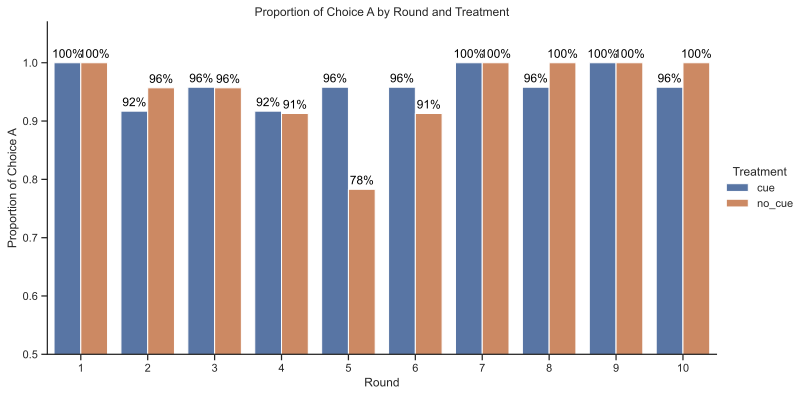

In [65]:
#| output: true
def plot_compare(df, x,y,hue,figsize=(12,6),fmt = '.2f'):
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params)
    # 设置图形大小
    plt.figure(figsize=figsize)

    # 使用seaborn的barplot函数绘制柱状图
    ax = sns.barplot(x=x, y=y, hue=hue, data=df)

    # 在柱体顶端添加数字
    for p in ax.patches:
        ax.annotate(f"{p.get_height():{fmt}}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
    return ax


ax = plot_compare(choice_A_proportion,x='round', y='proportion', hue='treatment',fmt='.0%')

plt.xlabel('Round')
plt.ylabel('Proportion of Choice A')
ax.set_ylim([0.5,1.07])
# 设置图例位置
plt.title("Proportion of Choice A by Round and Treatment")
ax.legend(title='Treatment', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

### 提议者选择A的比例：按pareto

In [66]:
#| output: true
choice_A_proportion = get_proportion(prop_df, 'pareto','choice == "A"',True)
show_no_index(choice_A_proportion)

pareto,treatment,proportion
weak,cue,0.958
weak,no_cue,0.978
not,cue,0.948
not,no_cue,0.891
strong,cue,0.979
strong,no_cue,1.000


不同treatment的卡方检验

In [67]:
#| output: true
chi2_test(prop_df,'pareto', ['weak','not','strong'],'choice')

pareto,Chi2,p-value
weak,0.000,1.000
not,1.352,0.245
strong,0.463,0.496


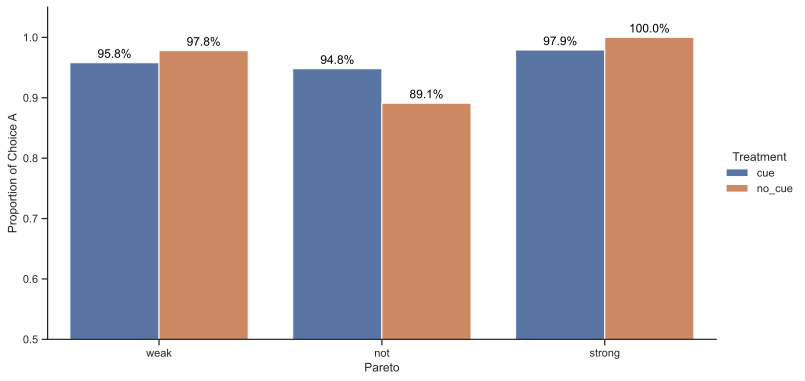

In [68]:
#| output: true
ax = plot_compare(choice_A_proportion,x='pareto', y='proportion', hue='treatment',figsize=(12,6),fmt='.01%')

plt.xlabel('Pareto')
plt.ylabel('Proportion of Choice A')
ax.set_ylim([0.5,1.05])
# 设置图例位置
ax.legend(title='Treatment', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()


## 回应者的选择 



In [69]:
# 提议者数据
resp_df =  mx.query('role == "回应者"')
resp_df.head()

,app,round,agent,choice,guess,hope,id_in_group,id_in_subsession,offer,partner_profit,payoff,profit,real_plan,respond,role,round_number,treatment,pareto
61,ug,1,player,NaN,0.0,50.0,2.0,NaN,NaN,100.0,0.0,100.0,NaN,0.0,回应者,NaN,no_cue,weak
121,ug,1,player,NaN,50.0,50.0,2.0,NaN,NaN,200.0,0.0,120.0,NaN,1.0,回应者,NaN,cue,weak
211,ug,1,player,NaN,50.0,100.0,2.0,NaN,NaN,200.0,0.0,106.9,NaN,1.0,回应者,NaN,no_cue,weak
241,ug,1,player,NaN,50.0,50.0,2.0,NaN,NaN,200.0,0.0,150.0,NaN,1.0,回应者,NaN,cue,weak
271,ug,1,player,NaN,50.0,50.0,2.0,NaN,NaN,200.0,0.0,100.0,NaN,1.0,回应者,NaN,cue,weak


### 回应者选择同意的比例：按round

In [70]:
#| output: true
choice_proportion = get_proportion(resp_df, 'round','respond == 1.0')
show_no_index(choice_proportion)

round,treatment,proportion
1,cue,0.833
1,no_cue,0.609
2,cue,0.833
2,no_cue,0.609
3,cue,0.458
3,no_cue,0.435
4,cue,0.500
4,no_cue,0.696
5,cue,0.417
5,no_cue,0.478


不同treatment的卡方检验

In [71]:
#| output: true
chi2_test(resp_df,'round',range(1,11),'respond')

round,Chi2,p-value
1,1.946,0.163
2,1.946,0.163
3,0.000,1.000
4,1.143,0.285
5,0.017,0.896
6,0.511,0.475
7,0.479,0.489
8,0.000,1.000
9,0.000,1.000
10,0.000,1.000


绘图

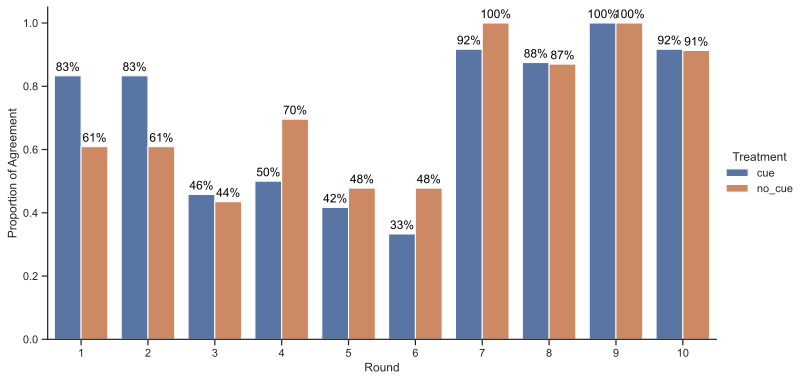

In [72]:
#| output: true
ax = plot_compare(choice_proportion,x='round', y='proportion', hue='treatment',figsize=(12,6),fmt='.0%')

plt.xlabel('Round')
plt.ylabel('Proportion of Agreement')
ax.set_ylim([0,1.05])
# 设置图例位置
ax.legend(title='Treatment', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

### 回应者选择同意的比例：按帕累托

In [73]:
#| output: true
choice_proportion = get_proportion(resp_df, 'pareto','respond == 1.0',sort=True)
show_no_index(choice_proportion)

pareto,treatment,proportion
weak,cue,0.833
weak,no_cue,0.609
not,cue,0.427
not,no_cue,0.522
strong,cue,0.927
strong,no_cue,0.946


不同treatment的卡方检验

In [74]:
#| output: true
chi2_test(resp_df,'pareto',['weak','not','strong'],'respond')

pareto,Chi2,p-value
weak,4.854,0.028
not,1.330,0.249
strong,0.049,0.824


绘图

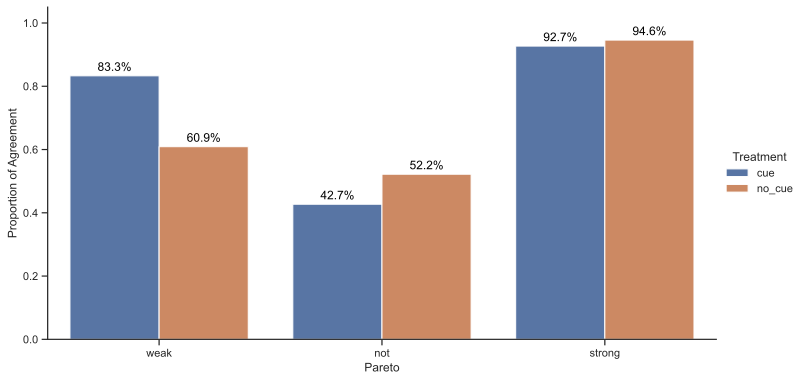

In [75]:
#| output: true
ax = plot_compare(choice_proportion,x='pareto', y='proportion', hue='treatment',figsize=(12,6),fmt='.01%')

plt.xlabel('Pareto')
plt.ylabel('Proportion of Agreement')
ax.set_ylim([0,1.05])
# 设置图例位置
ax.legend(title='Treatment', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

## 一致同意

一致同意：提议者选择A，且回应者选择同意。

### 一致同意的比例：按round

In [76]:
group_df = mx.query('agent == "group"')
group_df.head()

,app,round,agent,choice,guess,hope,id_in_group,id_in_subsession,offer,partner_profit,payoff,profit,real_plan,respond,role,round_number,treatment,pareto
0,ug,1,group,A,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN,A,1.0,NaN,NaN,cue,weak
30,ug,1,group,A,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,B,0.0,NaN,NaN,cue,weak
60,ug,1,group,A,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,B,0.0,NaN,NaN,no_cue,weak
90,ug,1,group,A,NaN,NaN,NaN,12.0,0.0,NaN,NaN,NaN,B,0.0,NaN,NaN,no_cue,weak
120,ug,1,group,A,NaN,NaN,NaN,2.0,20.0,NaN,NaN,NaN,A,1.0,NaN,NaN,cue,weak


In [77]:
#| output: true
choice_proportion = get_proportion(group_df, 'round','real_plan == "A"')
show_no_index(choice_proportion)

round,treatment,proportion
1,cue,0.833
1,no_cue,0.609
2,cue,0.833
2,no_cue,0.652
3,cue,0.500
3,no_cue,0.478
4,cue,0.500
4,no_cue,0.609
5,cue,0.375
5,no_cue,0.522


不同treatment的卡方检验

In [78]:
#| output: true
chi2_test(group_df,'round',range(1,11),'real_plan')

round,Chi2,p-value
1,4.854,0.028
2,3.158,0.076
3,0.000,0.996
4,0.726,0.394
5,1.496,0.221
6,0.642,0.423
7,2.220,0.136
8,0.165,0.685
9,0.000,1.000
10,0.226,0.634


绘图

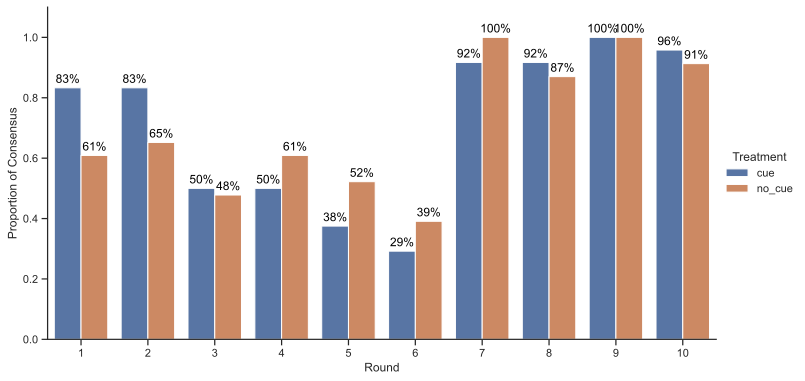

In [79]:
#| output: true
ax = plot_compare(choice_proportion,x='round', y='proportion', hue='treatment',figsize=(12,6),fmt='.0%')

plt.xlabel('Round')
plt.ylabel('Proportion of Consensus')
ax.set_ylim([0,1.1])
# 设置图例位置
ax.legend(title='Treatment', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

### 一致同意的比例：按帕累托

In [80]:
#| output: true
choice_proportion = get_proportion(group_df, 'pareto','real_plan == "A"', sort=True)
show_no_index(choice_proportion)

pareto,treatment,proportion
weak,cue,0.833
weak,no_cue,0.630
not,cue,0.417
not,no_cue,0.500
strong,cue,0.948
strong,no_cue,0.946


不同treatment的卡方检验

In [81]:
#| output: true

chi2_test(group_df,'pareto',['weak','not','strong'],'real_plan')

pareto,Chi2,p-value
weak,8.895,0.003
not,2.304,0.129
strong,0.000,1.000


绘图

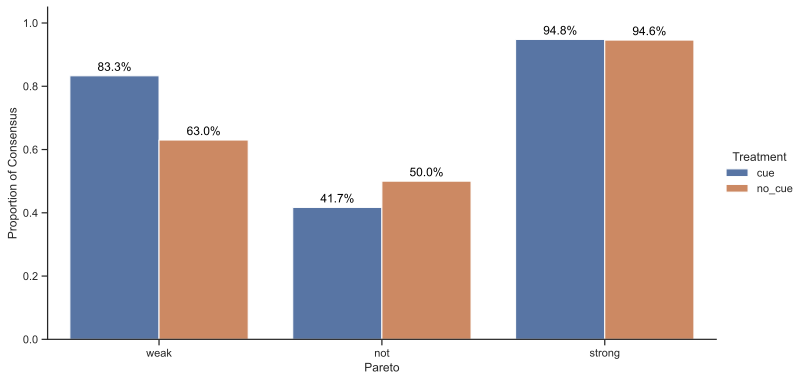

In [82]:
#| output: true
ax = plot_compare(choice_proportion,x='pareto', y='proportion', hue='treatment',figsize=(12,6),fmt="0.1%")

plt.xlabel('Pareto')
plt.ylabel('Proportion of Consensus')
ax.set_ylim([0,1.05])
# 设置图例位置
ax.legend(title='Treatment', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

## 实现的效率

效率：提议者和回应者的赢利之和，占理论最大总赢利的比例

In [83]:
mx['total_profit'] = mx['profit'] + mx['partner_profit']
mx

,app,round,agent,choice,guess,hope,id_in_group,id_in_subsession,offer,partner_profit,payoff,profit,real_plan,respond,role,round_number,treatment,pareto,total_profit
0,ug,1,group,A,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN,A,1.0,NaN,NaN,cue,weak,NaN
1,ug,1,player,A,NaN,NaN,1.0,NaN,0.0,100.0,0.0,200.0,NaN,NaN,提议者,NaN,cue,weak,300.0
30,ug,1,group,A,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,B,0.0,NaN,NaN,cue,weak,NaN
31,ug,1,player,A,NaN,NaN,1.0,NaN,0.0,100.0,0.0,100.0,NaN,NaN,提议者,NaN,cue,weak,200.0
60,ug,1,group,A,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,B,0.0,NaN,NaN,no_cue,weak,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2734,ug,10,player,NaN,0.0,100.0,2.0,NaN,NaN,260.0,0.0,150.0,NaN,1.0,回应者,NaN,no_cue,strong,410.0
2763,ug,10,group,A,NaN,NaN,NaN,6.0,10.0,NaN,NaN,NaN,A,1.0,NaN,NaN,cue,strong,NaN
2764,ug,10,player,A,NaN,NaN,1.0,NaN,10.0,140.0,0.0,250.0,NaN,NaN,提议者,NaN,cue,strong,390.0
2793,ug,10,group,A,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN,A,1.0,NaN,NaN,cue,strong,NaN


### 实现的效率：按round

In [84]:
tmp_df = mx.query('agent == "player" and id_in_group == 1')[['round','total_profit','treatment','pareto']]
tmp_df

,round,total_profit,treatment,pareto
1,1,300.0,cue,weak
31,1,200.0,cue,weak
91,1,200.0,no_cue,weak
151,1,300.0,cue,weak
181,1,250.0,no_cue,weak
...,...,...,...,...
2554,10,390.0,cue,strong
2584,10,390.0,no_cue,strong
2644,10,389.0,cue,strong
2704,10,370.0,no_cue,strong


匹配双方的赢利之和，在不同round和treamtment下的均值，及其占理论最大赢利的比例

In [85]:
#| output: true
import pandas as pd
from scipy.stats import ttest_ind

# 假设你的数据框名为df
# df = pd.read_csv("your_data.csv")  # 如果你的数据是从CSV文件中读取的，请取消注释这一行，并设置正确的文件名

# 对数据进行分组处理
grouped = tmp_df.groupby(['round', 'treatment'])

# 计算每组的均值
mean_total_profit = grouped['total_profit'].mean().round(3).reset_index(name = 'total_profit')

mean_total_profit['max_profit'] = [300,300,400,400] * 5
mean_total_profit['total_profit%'] = round(mean_total_profit['total_profit'] / mean_total_profit['max_profit'],3)
show_no_index(mean_total_profit)

round,treatment,total_profit,max_profit,total_profit%
1,cue,261.458,300,0.872
1,no_cue,249.265,300,0.831
2,cue,333.458,400,0.834
2,no_cue,301.522,400,0.754
3,cue,239.583,300,0.799
3,no_cue,235.174,300,0.784
4,cue,276.250,400,0.691
4,no_cue,283.000,400,0.708
5,cue,223.750,300,0.746
5,no_cue,226.696,300,0.756


对比不同treatment的t检验

In [86]:
#| output: true
def t_test(df, group, var):
    res = []
    # 获取round和treatment的唯一值
    unique_rounds = df[group].unique()
    unique_treatments = df['treatment'].unique()

    # 确保有且仅有两个treatment
    assert len(unique_treatments) == 2, "There should be exactly 2 unique treatments."

    # 对每个round进行两个独立样本t检验
    for r in unique_rounds:
        round_data = df[df[group] == r]
        treatment1_data = round_data[round_data['treatment'] == unique_treatments[0]][var]
        treatment2_data = round_data[round_data['treatment'] == unique_treatments[1]][var]
        t_stat, p_value = ttest_ind(treatment1_data, treatment2_data)

        res.append(pd.DataFrame({group:r,'t_stat' : round(t_stat,3),'p_value':round(p_value,3)},index=[r]))

        #print(f"Round {r}: t_stat = {t_stat:.2f}, p_value = {p_value:.2f}")
    return pd.concat(res,axis=0)

show_no_index(t_test(tmp_df,'round','total_profit'))

round,t_stat,p_value
1,1.016,0.315
2,1.480,0.146
3,0.360,0.720
4,-0.288,0.774
5,-0.291,0.772
6,-0.607,0.547
7,-1.435,0.158
8,0.814,0.420
9,-0.252,0.802
10,0.333,0.741


绘图

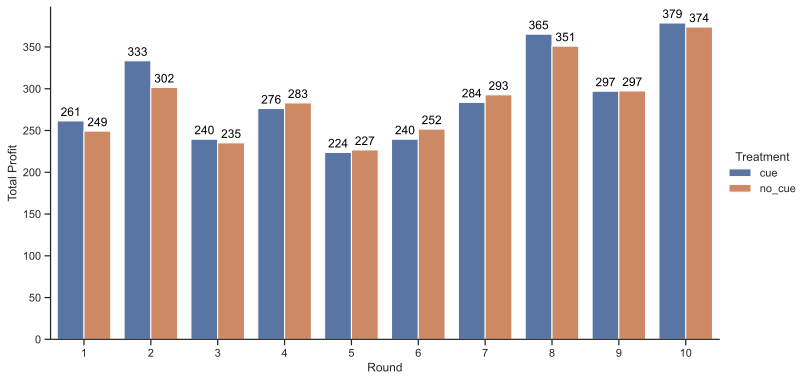

In [87]:
#| output: true
ax = plot_compare(mean_total_profit,x='round', y='total_profit', hue='treatment',figsize=(12,6),fmt='.0f')

plt.xlabel('Round')
plt.ylabel('Total Profit')
#ax.set_ylim([0,1.1])
# 设置图例位置
ax.legend(title='Treatment', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

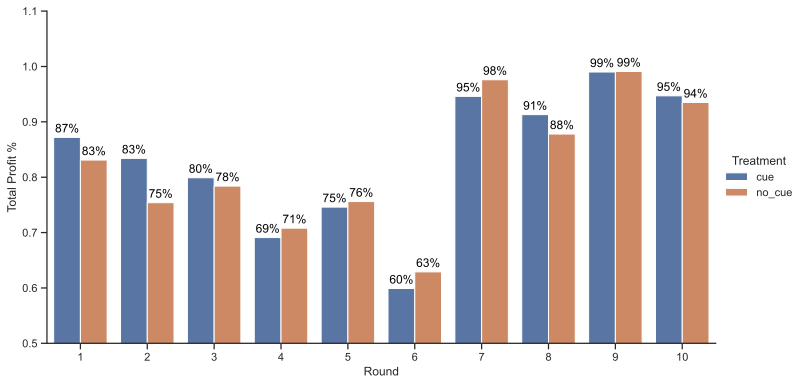

In [88]:
#| output: true
ax = plot_compare(mean_total_profit,x='round', y='total_profit%', hue='treatment',figsize=(12,6),fmt='.0%')

plt.xlabel('Round')
plt.ylabel('Total Profit %')
ax.set_ylim([0.5,1.1])
# 设置图例位置
ax.legend(title='Treatment', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

### 实现的效率：按帕累托

注：在每一种帕累托情形下，包括了不同的理论最大赢利的情况，因此采用绝对量可能没有意义，这里只保留了占比。同样，t检验也是针对比例进行的。

In [89]:
def set_max_profit(i):
    if i % 2 == 1:
        return 300
    else:
        return 400

In [90]:
tmp_df['max_profit'] = tmp_df['round'].apply(set_max_profit)
tmp_df['total_profit%'] = round(tmp_df['total_profit'] / tmp_df['max_profit'],3)
tmp_df

,round,total_profit,treatment,pareto,max_profit,total_profit%
1,1,300.0,cue,weak,300,1.000
31,1,200.0,cue,weak,300,0.667
91,1,200.0,no_cue,weak,300,0.667
151,1,300.0,cue,weak,300,1.000
181,1,250.0,no_cue,weak,300,0.833
...,...,...,...,...,...,...
2554,10,390.0,cue,strong,400,0.975
2584,10,390.0,no_cue,strong,400,0.975
2644,10,389.0,cue,strong,400,0.972
2704,10,370.0,no_cue,strong,400,0.925


In [91]:
#| output: true

# 对数据进行分组处理
grouped = tmp_df.groupby(['pareto', 'treatment'])

# 计算每组的均值
mean_total_profit = sort_col_by_list(grouped['total_profit%'].mean().round(3).reset_index(name = 'total_profit%'))


#mean_total_profit['max_profit'] = [300,300,400,400] * 5
#mean_total_profit['total_profit%'] = round(mean_total_profit['total_profit'] / mean_total_profit['max_profit'],3)
show_no_index(mean_total_profit)

pareto,treatment,total_profit%
weak,cue,0.853
weak,no_cue,0.792
not,cue,0.709
not,no_cue,0.719
strong,cue,0.949
strong,no_cue,0.945


In [92]:
show_no_index(t_test(tmp_df,'pareto','total_profit%'))

pareto,t_stat,p_value
weak,1.781,0.078
not,-0.424,0.672
strong,0.269,0.788


绘图

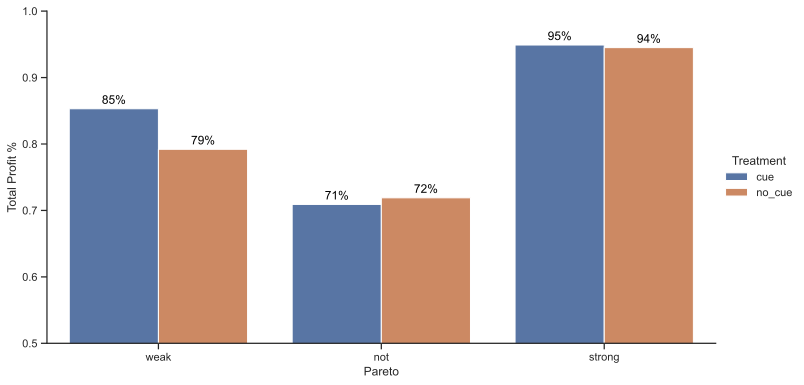

In [93]:
#| output: true
ax = plot_compare(mean_total_profit,x='pareto', y='total_profit%', hue='treatment',figsize=(12,6),fmt='.0%')

plt.xlabel('Pareto')
plt.ylabel('Total Profit %')
ax.set_ylim([0.5,1])
# 设置图例位置
ax.legend(title='Treatment', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

## 开心满意

happy值是从1到10的整数，越大表示越开心。

In [94]:
happy = melt_app(df.app('demographics')).query('agent == "player"')['happy']

In [95]:
treament = melt_app(df.app('ug').rounds(1)).query('agent == "player"')['treatment']

In [96]:
tmp_df = pd.concat([happy,treament],axis=1)

不同treatment的happy均值

In [97]:
#| output: true
show_no_index(tmp_df.groupby('treatment').mean('happy').round(2).reset_index())

treatment,happy
cue,6.33
no_cue,6.80


不同treatment的t检验

In [98]:
#| output: true
t_stat, p_value = ttest_ind(tmp_df.query('treatment == "cue"')['happy'], tmp_df.query('treatment == "no_cue"')['happy'])
show_no_index(pd.DataFrame(dict(t_stat = t_stat,p_value = p_value),index=[0]).round(3))

t_stat,p_value
-1.202,0.232


# 其他（占位符）